In [364]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.getcwd()) 

X = pd.read_csv('X_features.csv', index_col=0)
y = pd.read_csv('y_features.csv', index_col=0)
groups = X.pop('Feature_7')

test = pd.read_csv('test_features.csv', index_col=0).drop(columns = 'Feature_7')

C:\Users\matze\Documents\Winton\CRISPDM


In [365]:
display(X.head())
X.shape

,Feature_2,Feature_3,Feature_4,Feature_6,Feature_8,Feature_9,Feature_11,Feature_12,Feature_13,Feature_14,...,Ranked_7_PR_120,Ranked_7_PR_Last_10,Ranked_7_PR_Last_30,Ranked_7_PR_Last_5,Ranked_7_PR_Last_60,fet_7_Minute_Mean,fet_7_Minute_MAD,fet_7_Minute_Sum,fet_7_Minute_Sum_MAD,0
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.117558,0.558392,0.405572,0.430972,0.2254,11.0,-0.572244,0.49,5.0,1.842984,...,1.0,4.0,2.0,13.0,1.0,-9.951471e-06,0.000042,-0.001134,0.004810,-0.029308
2,-0.117558,0.558392,0.405572,0.388896,0.0166,13.0,-0.409923,0.71,9.0,1.577586,...,1.0,18.0,10.0,11.0,5.0,2.410986e-05,0.000027,0.002749,0.003038,-0.009560
3,-0.696727,0.739591,-0.167928,0.471947,0.3650,9.0,-0.473024,0.03,6.0,1.871160,...,42.0,44.0,60.0,6.0,58.0,-1.365349e-05,0.000032,-0.001556,0.003596,-0.008021
4,-0.694350,1.568248,0.479073,0.120653,0.2654,13.0,-2.138383,0.00,6.0,1.588524,...,39.0,38.0,23.0,41.0,35.0,5.758270e-07,0.000027,0.000066,0.003030,-0.002090
5,-1.736489,2.765531,1.245280,4.866985,0.2138,13.0,-4.795565,0.97,5.0,0.842102,...,21.0,22.0,30.0,11.0,16.0,-1.085946e-05,0.000029,-0.001238,0.003261,-0.006019


(40000, 271)

In [3]:
sample = pd.read_csv('sample_submission_2.csv')
df_train = pd.read_csv('train.csv')

# Models for Ret_PlusOne

## Ridge

In [372]:
# interactions
X['interaction_3']= X.PR_120 * X.grouped_mad_fet_7
test['interaction_3']= test.PR_120 * test.grouped_mad_fet_7

#X['interaction_4']= X.smoothed_minute_mean * X.minute_mad
#test['interaction_4']= test.smoothed_minute_mean * test.minute_mad

X['interaction_5']= X.minute_mad * X.PR_120
test['interaction_5']= test.minute_mad * test.PR_120

X['interaction_6']= X.smoothed_minute_mean * X.grouped_mad_fet_5
test['interaction_6']= test.smoothed_minute_mean * test.grouped_mad_fet_5

X['interaction_7']= X.PR_120 * X.fet_7_Minute_MAD
test['interaction_7']= test.PR_120 * test.fet_7_Minute_MAD

X['interaction_8']= X.fet_7_Minute_MAD * X.fet_7_Minute_Mean
test['interaction_8']= test.fet_7_Minute_MAD * test.fet_7_Minute_Mean


# Ret_PlusOne
cols_to_use=[
 'interaction_8',
 'interaction_7',
 'fet_7_Minute_Mean',
 'interaction_3',
 #'interaction_4', #verschlechtert das modell
 'interaction_5',
 'interaction_6',
 'Delta_last_5',
 'smoothed_minute_mean',
 'smoothed_minute_sum',
 'interaction_1',
 'PR_Last_10',
 'Delta_119',
 'PR_120',
 'minute_mean',
 'minute_sum',
 'Delta_120',
 'Delta_last_60',
 'fet_7_absdiff_RetDaily_Mad',
 'PR_Last_60',
 #'Delta_dif_10_120',
 #'Diff_Ranked',
 'Delta_last_10',
 'interaction_2',
 #'grouped_rank_daily_2', removing them improved the model
 #'Rank_MinusTwo', removing them improved the model
 'PR_Last_30',
 #'PR_Last_5',
 #'last_minute_diff',
 #'fet_7_diff_RetDaily_Mad',
 #'fet_7_fet_5_Ret_MinusOne_Mad',
 #'Delta_dif_60_60',
 #'smoothed_minute_25_quantile',
 #'minute_kurt',
 #'Ret_MinusOne',
 #'last_minute_sum'
 #most correalting with ret plus two

]

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


ridge = Ridge()
param_grid= {'alpha': [20,19,18,17,16,15,12,11],'normalize':[True],'max_iter':[700], 'random_state': [0]}
gs= GridSearchCV(ridge, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_PlusOne, groups)
gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )


###do not ever overwrite the winning solution
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

grid['Ret_PlusOne'] = ((gs.predict(test[cols_to_use])))

sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_PlusOne_ridge_aplha_18_new_interaction_7_8.csv', index=False)

#-0.01575766851627325 nur mit interaction 3
#-0.01575671834227754 ohne 4
#-0.015756860156482495 mit alles interactions
#-0.01575784705279763
#-0.015756375888029382 feature 7 minute mean

Ridge(alpha=19, copy_X=True, fit_intercept=True, max_iter=700, normalize=True,
   random_state=0, solver='auto', tol=0.001)

-0.01575602788214616

zuerst hab ich ausprobiert ein kleineres aplha zu benutzen weil ich irgendwo gelesen hab das die regularisierung idr schon bei sehr kleinen alphas sehr zuverlässig ist allerdings hab ich mit einem alpha von 1 eine schlechtere score erzielt als die benchmark
meine ersten alphas waren [ 100,10,7,4] und es wurde 10 gewählt, nachdem ich gesehen hab wie stark der effekt von alpha auf die ergebnisse sein kann hab ich versucht es weiter zu optimieren und filigranere werte um 10 gewählt mit dem ergebnis das 17 gewählt wurde und und sich die score nochmal ein stück verbessert hat auf 1728.18407 was platz 30 auf dem leaderboard entspricht
ein riesen vorteil an linearen modellen ist das sie super schnell zu fitten sind und demensprechen optimierung super schnell geht
außerdem zeigt die optimierung das mein cross validationset funktioniert was auch geil ist

jetzt kann man noch versuchen durch float werte um 17 weiter zu optimieren allerdings muss ich da erst schauen wie groß der effekt überhaupt noch ist --> keine weitere verbesserung 17 bleibt das optimum

### anzahl der features veränder
wenn ich 30 statt 20 features nehme verschlechtert sich die score ein bisschen was bedeutet ich füg irgendwie wieder noise hinzu jetzt dann mal checken ob weniger features vlt bessere ergebnisse erzielen auch weil auf dem graphen mit den koeffizienten die beiden interactionen besonders hervorstechen, was aber auch an skalierung liegen kann

hab grad kurz gegoogelt und normalisieren (0,1) der daten bei ridge hat den vorteil, dass sich die relative wichtigkeit der  koeffizienten interpretieren lassen, allerdings das modell an sich nicht mehr
standartisiereung hat wohl den vorteil, das sich da model noch interpretiren lässt

jetzt wollte ich die top 15 korrelierenden features nehmen dabei ist mir dann aber aufgefallen, das ich auch einen interactionsterm rausnehmen müsste, was glaube ich nicht so gut wäre aber ich sollte es trtzdem probieren
ich hab jetzt erstmal 2 minuten feautres raus um zu testen ob es was verbesser aber so oder so scheint korrelation nicht das beste mittel zur feature selection allerdings waren 'PR_last_10' und 'Delta_Last_10' auch relativ ähnlich
außerdem sind teilweise ähnliche Features drinnen wie Delta_119 und Delta_120 vlt eins mit raus nehmen und mal die raus nehmen die geringe koeffizienten haben

nachdem ich 'grouped_rank_daily_2' und 'Rank_MinusTwo' rausgenommen hab hat sich die score nochmal ein kleines bisschen verbesser, beide waren relativ weit unten bei den korrelationen und hatten keine sichtbaren koeffizienten bei ridge ich hab jetzt die anderen beiden ohne sichtbaren koeffizienten auch raus und mal schauen was sich dann so tut
- hat sich nochmal ein kleines bisschen verbessert jetzt gibt es aber keine mehr ohne sichbaren einfluss und ich glaub ich schau jetzt mal nach anderen möglichekeiten weiter zu kommen z.b. mehr interaktionen **und alpha hat sich jetzt auf 18 verändert**

also neue features hinzufügen hat egal wie zu keiner verbesserung geführ also lass ich das jetzt wieder was aber komisch ist, ist das die features die der algorithmus benutzt fast nur minuten werte sind die eigentlich keinen zusammenhang mit morgen haben sollten, hab jetzt mal die interactionen entfernt und das modell versclechtert sich doch relativ stark ist aber immernoch besser als die benchmark

weitere interactionen die ich hier schnell berechnet hab haben noch mal 0.2-0.4 gebracht allerdings gilt das bloß für die private score und nicht für die public score, insbesondere bei interaction 7 und 8 auf basis von fet 7 minute mad haben auf dem public leaderboard zu einer verschlechterung geführt auf dem private leaderboard allerdings zu einer verbesserung

In [96]:
display(gs.best_estimator_)
display(gs.best_score_) 
#-0.015757554282432244 top 20 features alpha 17 || LB: 1728.18407
#-0.015757003916674322 top 30 featuers alpha 17 || LB: 1728.18985 
#-0.0157584373749962 18/20 top fet alpha 17 || LB: 1728.16958 (removed two of low correlating and where ridge hat not really a koefficent)

Ridge(alpha=18, copy_X=True, fit_intercept=True, max_iter=700, normalize=True,
   random_state=None, solver='auto', tol=0.001)

-0.01575833195085613

<Container object of 14 artists>

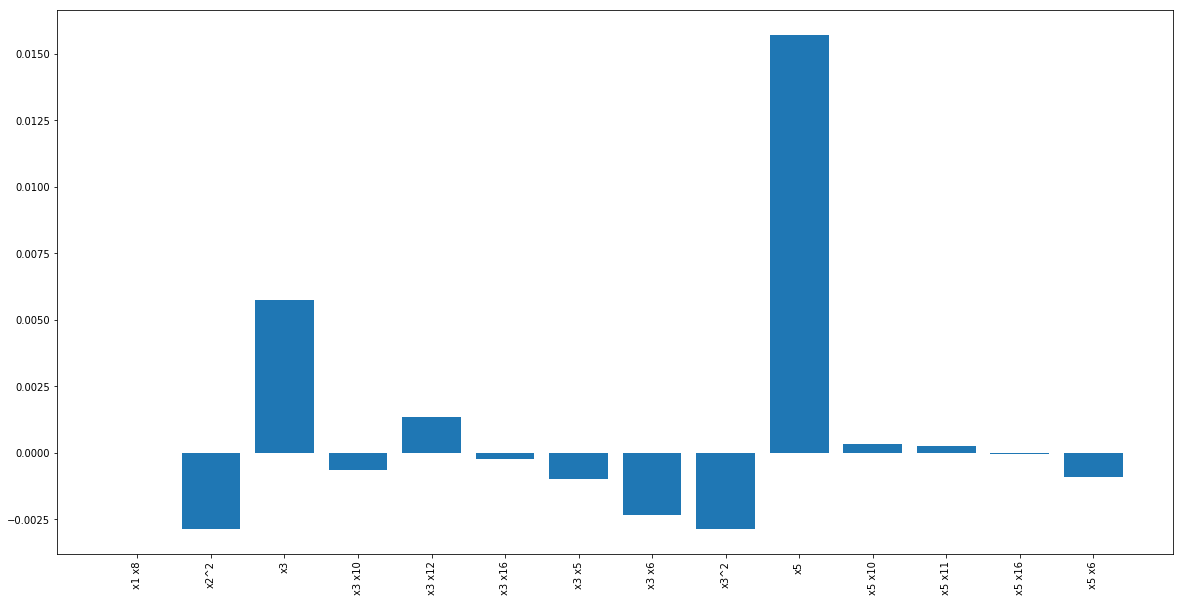

In [396]:

#fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.bar(cols_to_use, gs.best_estimator_.coef_)

interactionterms funktionieren ziemlich geil evtl da noch ein paar ausprobieren oder einfach poly features für einen teil davon und nochmal die correlation berechnen

### FEature importance with Random Forest
siehe email

In [389]:
from sklearn.ensemble import GradientBoostingRegressor
import time
t0=time.time()

cols_to_use =[
 'interaction_8',
 'interaction_7',
 'fet_7_Minute_Mean',
 'interaction_3',
 #'interaction_4', #verschlechtert das modell
 'interaction_5',
 'interaction_6',
 'Delta_last_5',
 'smoothed_minute_mean', 'smoothed_minute_sum',
       'interaction_1', 'PR_Last_10', 'Delta_119', 'PR_120', 'minute_mean',
       'minute_sum', 'Delta_120', 'Delta_last_60',
       'fet_7_absdiff_RetDaily_Mad', 'PR_Last_60', 'Delta_dif_10_120',
       'Diff_Ranked', 'Delta_last_10', 'interaction_2', 'grouped_rank_daily_2',
       'Rank_MinusTwo', 'PR_Last_30', 'PR_Last_5', 'last_minute_diff',
       'fet_7_diff_RetDaily_Mad', 'fet_7_fet_5_Ret_MinusOne_Mad',
       'Delta_dif_60_60', 'smoothed_minute_25_quantile', 'minute_kurt',
       'Ret_MinusOne', 'last_minute_sum']

gbm = GradientBoostingRegressor()
param_grid= {'random_state': [0],'n_estimators': [6,5],'loss':['ls'],'max_depth':[2,1],
             'max_features':['sqrt'],
             'min_samples_leaf':[3,2,1],
             'min_samples_split':[20,100]}
gs= GridSearchCV(gbm, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_PlusOne, groups)

print("training time:", round(time.time()-t0, 3), "s")

gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )



###do not ever overwrite the winning solution
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

grid['Ret_PlusOne'] = ((gs.predict(test[cols_to_use])))

sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_PlusOne_gbm_6.csv', index=False)

#0.016339105417099438 gbm 200 trees
#0.016239437064163274 gbm 200 huber
#0.0158... gbm 200
#-0.01577489575507015
'''GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=9, presort='auto',
             random_state=0, subsample=1.0, verbose=0, warm_start=False)'''


training time: 25.703 s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=20,
             min_weight_fraction_leaf=0.0, n_estimators=6, presort='auto',
             random_state=0, subsample=1.0, verbose=0, warm_start=False)

-0.01577111157916574

"GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,\n             learning_rate=0.1, loss='ls', max_depth=1,\n             max_features='sqrt', max_leaf_nodes=None,\n             min_impurity_decrease=0.0, min_impurity_split=None,\n             min_samples_leaf=2, min_samples_split=4,\n             min_weight_fraction_leaf=0.0, n_estimators=9, presort='auto',\n             random_state=0, subsample=1.0, verbose=0, warm_start=False)"

In [323]:
sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_PlusOne_gbm_10.csv', index=False)


In [395]:
features = np.asarray(cols_to_use)
importances = gs.best_estimator_.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')


AttributeError: 'HuberRegressor' object has no attribute 'feature_importances_'

### GBM beating the Zerobenchmark slightly

also ich hab jetzt angefangen GBM auf dem korrelierenden Features zu trainieren und wieder zeigt sich wie maßgeblich die parameter einfluss auf die modelle haben, hab die n estimators von 100 auf unter 10 herabgesetzt und langsam wird es interesannt, außerdem zeigt sich wieder das mein CV set einigermaßen funktioniert

Der erste GBM der die ZeroBenchmark allerdings nur auf dem Private LB geschlagen hat war auf basis der 20 top cor features folgender stimator
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=9, presort='auto',
             random_state=0, subsample=1.0, verbose=0, warm_start=False)

-0.015778046226966144 leaderboardscore = 

### The first score beating model
Scores 1769.96181

Estimator:

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=700, normalize=True,
   random_state=None, solver='auto', tol=0.001)
   
   
clipping still beats the zeros but its not as good as without clipping

Dividing by 8 (using 0.8 as a constant) imporoves the score to 1769.94673

the less i blend it with the zeros the better it gets the final result for not deviding is
1769.93298 on the public leaderboard and 1728.23696 on the more important private leaderboard

### Huber Regression

In [211]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor()

cols_to_use=['Delta_last_5',
 'smoothed_minute_mean',
 'smoothed_minute_sum',
 'inteaction_1',
 'PR_Last_10',
 'Delta_119',
 'PR_120',
 'minute_mean',
 'minute_sum',
 'Delta_120',
 'Delta_last_60',
 'fet_7_absdiff_RetDaily_Mad',
 'PR_Last_60',
 #'Delta_dif_10_120',
 'Diff_Ranked',
 'Delta_last_10',
 'inteaction_2',
 'grouped_rank_daily_2', #removing them improved the model
 'Rank_MinusTwo', #removing them improved the model
 'PR_Last_30',
 #'PR_Last_5',
 #'last_minute_diff',
 'fet_7_diff_RetDaily_Mad',
 'fet_7_fet_5_Ret_MinusOne_Mad',
 #'Delta_dif_60_60',
 #'smoothed_minute_25_quantile',
 #'minute_kurt',
 #'Ret_MinusOne',
 #'last_minute_sum'
 #most correalting with ret plus two
            ]

param_grid= {'alpha': [200,190,180], 'epsilon':[1,1.1,1.2 ],'max_iter':[700]}
gs= GridSearchCV(huber, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_PlusOne, groups)
gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_) #-0.015748066482884227


HuberRegressor(alpha=190, epsilon=1, fit_intercept=True, max_iter=700,
        tol=1e-05, warm_start=False)

-0.015746708355898777

In [212]:
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

grid['Ret_PlusOne'] = ((gs.predict(test[cols_to_use])))

sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_PlusOne_huber_aplha_190_eps_1.csv', index=False)

# Minute Rets

In [106]:
### Ret_Next_60 (only predicting next 5 Minutes though)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

cols_to_use =  ['fet_7_diff_RetDaily_Mean', 'fet_7_fet_5_Diff_Daily_Mean',
       'fet_7_RetMinTwo_Mean', 'grouped_mean_fet_7', 'fet_7_RetMinOne_Mean',
       'fet_7_fet_5_Ret_MinusTwo_Mean', 'daily_diff',
       'fet_7_fet_5_Ret_MinusOne_Mean', 'Ret_MinusTwo', 'last_minute_sum', 'PR_Last_10', 'Delta_last_5']

ridge = Ridge()
param_grid= {'alpha': [15,10,7 ,5,1,0.1],'normalize':[False, True],'max_iter':[700]}
gs= GridSearchCV(ridge, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_Next_60, groups)
gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )


sample = pd.read_csv('sample_submission_2.csv')
df_train = pd.read_csv('train.csv')
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

for cols in grid.loc[:,'Ret_121':'Ret_125'].columns:
    grid[cols] = ((gs.predict(test[cols_to_use]))/60)
    
#sample['Predicted'] = grid.values.flatten()
#sample.to_csv('submissions/Ret_Next_60with_ridge.csv', index=False)

Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=700, normalize=True,
   random_state=None, solver='auto', tol=0.001)

-0.004819276309693662

In [ ]:
### lasso mit Ret_next_10

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

cols_to_use =  ['Ranked_7_PR_Last_30', 'Ranked_7_PR_Last_60' ,'Ranked_7_PR_Last_10', 'Ranked_7_PR_120',
'Ranked_7_PR_Last_5',
'daily_sum',
'PR_Last_30',
'Ret_MinusOne',
'fet_7_RetMinTwo_Mean',
'Ret_MinusTwo',
'PR_Last_10',
'MAD_dif_60_120',
]

lasso = Lasso()
param_grid= {'alpha': [10,7 ,5,1,0.1],'normalize':[False, True],'max_iter':[700]}
gs= GridSearchCV(lasso, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_Next_10, groups)
gs.cv_results_ 
gs.best_estimator_
gs.best_score_ 

grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

for cols in grid.loc[:,'Ret_121':'Ret_130'].columns:
    grid[cols] = ((gs.predict(test[cols_to_use]))/10)
    
#sample['Predicted'] = grid.values.flatten()
#sample.to_csv('submissions/Ret_Next_10with_lasso.csv', index=False)

score: 1770.04587

In [201]:
### ridge mit Ret_next_10

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

cols_to_use =  ['Ranked_7_PR_Last_30',
 #'Ranked_7_PR_Last_60',
 #'Ranked_7_PR_Last_10',
 #'Ranked_7_PR_120',
 #'Ranked_7_PR_Last_5',
 'daily_sum',
 'PR_Last_30',
 'Ret_MinusOne',
 #'fet_7_RetMinTwo_Mean',
 'Ret_MinusTwo',
 'PR_Last_10',
 'MAD_dif_60_120',
 'Delta_last_10',
 #'fet_7_fet_5_Ret_MinusTwo_Mean',
 'inteaction_2',
 'AbsDiff_Ranked',
 'inteaction_2',
 'inteaction_1'
               ]

lasso = Lasso()
param_grid= {'alpha': [1000,960,959,958,900,55,51,50,40,30,16,15,14,13,12,11,10],'normalize':[True],'max_iter':[700],'random_state':[0]}
gs= GridSearchCV(lasso, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_Next_10, groups)
gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )

grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

for cols in grid.loc[:,'Ret_121':'Ret_130'].columns:
    grid[cols] = ((gs.predict(test[cols_to_use]))/10)
    
sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_Next_10with_lasso_alpha1000.csv', index=False)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=700,
   normalize=True, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

-0.0017868019120695674

# Models for Ret_PlusTwo

In [198]:

# Ret_PlusTwo
cols_to_use=['fet_7_absdiff_RetDaily_Mean',
 #'last_minute_diff',
 
 'fet_7_RetMinTwo_Mad',
 'fet_7_absdiff_RetDaily_Mad',
 #'MAD_last_60',
 'abs_daily_diff',
 'MAD_dif_60_120',
 'MAD_120',
 'minute_median',
 'minute_mad',
 #'minute_sem',
 #'minute_var',
 'minute_std',
 'smoothed_minute_var',
 'smoothed_minute_std',
 'smoothed_minute_sem',
 'fet_7_fet_5_AbsDiff_Daily_Mean',
 #'smoothed_minute_median',
 #'smoothed_minute_mad',
 #'MAD_last_30',
 'fet_7_diff_RetDaily_Mad',
 #'grouped_rank_daily_2',
 #'Rank_MinusTwo'
 ]

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


ridge = Ridge()
param_grid= {'alpha': [100,60,20,19,18,17,16,15,12,11],'normalize':[False, True],'max_iter':[700]}
gs= GridSearchCV(ridge, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_PlusTwo, groups)
gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )


###do not ever overwrite the winning solution
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

grid['Ret_PlusTwo'] = ((gs.predict(test[cols_to_use])))

sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_PlusTwo_ridge_aplha_17_23_fet.csv', index=False)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=700,
   normalize=False, random_state=None, solver='auto', tol=0.001)

-0.015192656593536035

-0.015192651972771632

the 20 most correlating features for Ret_PlusTwo an with Rodge(alpha=100) scores with 1728.57031 on the leaderboard

## Combinbing best ResPlusOne and Best RetPlusTwo

In [394]:
cols_to_use=[
 'interaction_8',
 'interaction_7',
 'fet_7_Minute_Mean',
 'interaction_3',
 #'interaction_4', #verschlechtert das modell
 'interaction_5',
 'interaction_6',
 #new features   
 'Delta_last_5',
 'smoothed_minute_mean',
 'smoothed_minute_sum',
 'interaction_1',
 'PR_Last_10',
 'Delta_119',
 'PR_120',
 'minute_mean',
 'minute_sum',
 'Delta_120',
 'Delta_last_60',
 'fet_7_absdiff_RetDaily_Mad',
 'PR_Last_60',
 #'Delta_dif_10_120',
 #'Diff_Ranked',
 'Delta_last_10',
 'interaction_2',
 #'grouped_rank_daily_2', removing them improved the model
 #'Rank_MinusTwo', removing them improved the model
 'PR_Last_30',
 #'PR_Last_5',
 #'last_minute_diff',
 #'fet_7_diff_RetDaily_Mad',
 #'fet_7_fet_5_Ret_MinusOne_Mad',
 #'Delta_dif_60_60',
 #'smoothed_minute_25_quantile',
 #'minute_kurt',
 #'Ret_MinusOne',
 #'last_minute_sum'
 #most correalting with ret plus two

]

ridge = Ridge()
param_grid= {'alpha': [20,19,18,17,16,15,12,11],'normalize':[False, True],'max_iter':[700]}
gs= GridSearchCV(ridge, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_PlusOne, groups)
gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )

###do not ever overwrite the winning solution
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

grid['Ret_PlusOne'] = ((gs.predict(test[cols_to_use])))


# Ret_PlusTwo
'''
cols_to_use=['fet_7_absdiff_RetDaily_Mean',
 'last_minute_diff',
 
 'fet_7_RetMinTwo_Mad',
 'fet_7_absdiff_RetDaily_Mad',
 'MAD_last_60',
 'abs_daily_diff',
 'MAD_dif_60_120',
 'MAD_120',
 'minute_median',
 'minute_mad',
 'minute_sem',
 'minute_var',
 'minute_std',
 'smoothed_minute_var',
 'smoothed_minute_std',
 'smoothed_minute_sem',
 'fet_7_fet_5_AbsDiff_Daily_Mean',
 'smoothed_minute_median',
 'smoothed_minute_mad',
 'MAD_last_30',
 'fet_7_diff_RetDaily_Mad',
 ]

ridge = Ridge()
param_grid= {'alpha': [100,60,20,19,18,17,16,15,12,11],'normalize':[False, True],'max_iter':[700]}
gs= GridSearchCV(ridge, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X[cols_to_use], y.Ret_PlusTwo, groups)
gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )


###do not ever overwrite the winning solution

grid['Ret_PlusTwo'] = ((gs.predict(test[cols_to_use])))
'''
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor

cols_to_use=['x1 x8',
 'x3 x16',
 'x5 x10',
 'x5 x16',
 'x5',
 'x5 x6',
 'x3 x6',
 'x3 x5',
 'x5 x11',
 'x3 x10',
 'x3^2',
 'x2^2',
 'x3',
 'x3 x12']

huber = HuberRegressor()
param_grid= {'alpha': [100,20,19,18,17,16,15,12,11],'epsilon':[1],'max_iter':[700]}
gs= GridSearchCV(huber, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X_2[cols_to_use], y.Ret_PlusTwo, groups)
gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )


###do not ever overwrite the winning solution

grid['Ret_PlusTwo'] = ((gs.predict(test_2[cols_to_use])))


#sample['Predicted'] = grid.values.flatten()
#sample.to_csv('submissions/Ret_PlusOneTwo_ridge_huber_fet_int.csv', index=False)

''' old
Ridge(alpha=18, copy_X=True, fit_intercept=True, max_iter=700, normalize=True,
   random_state=None, solver='auto', tol=0.001)

-0.015758869963216026

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=700,
   normalize=False, random_state=None, solver='auto', tol=0.001)

-0.015192651972771632
'''

Ridge(alpha=19, copy_X=True, fit_intercept=True, max_iter=700, normalize=True,
   random_state=None, solver='auto', tol=0.001)

-0.01575602788214616

HuberRegressor(alpha=100, epsilon=1, fit_intercept=True, max_iter=700,
        tol=1e-05, warm_start=False)

-0.01517831440283846

" old\nRidge(alpha=18, copy_X=True, fit_intercept=True, max_iter=700, normalize=True,\n   random_state=None, solver='auto', tol=0.001)\n\n-0.015758869963216026\n\nRidge(alpha=100, copy_X=True, fit_intercept=True, max_iter=700,\n   normalize=False, random_state=None, solver='auto', tol=0.001)\n\n-0.015192651972771632\n"

# Trying Interactions

In [247]:
display(X_2.shape)
display(test_2.shape)

(40000, 190)

(120000, 190)

In [377]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
X_2 = pd.read_csv('X_features_2.csv', index_col=0)
test_2 = pd.read_csv('test_features_2.csv', index_col=0)
X_2 = pd.DataFrame(poly.fit_transform(X_2), columns= poly.get_feature_names())
test_2=pd.DataFrame(poly.fit_transform(test_2), columns= poly.get_feature_names())

In [378]:
X_2.head()

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x19^2,x19 x20,x19 x21,x19 x22,x20^2,x20 x21,x20 x22,x21^2,x21 x22,x22^2
0,1.0,-5.286893e-07,-7.099071e-07,-0.066045,0.066045,0.044505,0.000143,0.000143,0.000125,-0.003243,...,1.780043e-09,-4.786382e-08,2.029249e-07,-1.236501e-06,1.287017e-06,-5.456475e-06,3.324844e-05,0.000023,-0.000141,0.000859
1,1.0,-1.545452e-07,5.356965e-08,-0.006760,0.006760,0.012735,0.000263,0.000263,0.000249,0.002226,...,7.100520e-10,7.323937e-08,8.094592e-08,-2.547479e-07,7.554384e-06,8.349288e-06,-2.627635e-05,0.000009,-0.000029,0.000091
2,1.0,-8.857104e-07,1.083472e-07,0.003104,0.003104,0.009258,-0.000101,0.000101,-0.000642,-0.003532,...,9.949417e-10,-4.909615e-08,1.134234e-07,-2.530092e-07,2.422686e-06,-5.596961e-06,1.248493e-05,0.000013,-0.000029,0.000064
3,1.0,-8.064639e-08,-2.398953e-07,0.013122,0.013122,0.015090,0.000069,0.000069,0.000375,0.019371,...,7.062566e-10,1.744529e-09,8.051326e-08,-5.554555e-08,4.309171e-09,1.988763e-07,-1.372034e-07,0.000009,-0.000006,0.000004
4,1.0,-1.245552e-08,6.795388e-07,0.029289,0.029289,-0.007159,-0.001208,0.001208,0.001207,0.007319,...,8.184735e-10,-3.541729e-08,9.330598e-08,-1.722047e-07,1.532590e-06,-4.037571e-06,7.451706e-06,0.000011,-0.000020,0.000036


## Ret_PlusOne
### ridge

In [386]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

cols_to_use=['x16 x18',
 'x20 x22',
 'x6 x18',
 'x10 x18',
 'x20 x21',
 'x18 x21',
 'x13 x20',
 'x3 x20',
 'x18',
 'x20',
 'x11 x20',
 'x12 x18',
 'x9 x18',
 'x15 x16',
 'x16 x17',
 ]

ridge = Ridge()
param_grid= {'alpha': [23,22,21,20,19,18,17],'normalize':[True],'max_iter':[700], 'random_state': [0]}
gs= GridSearchCV(ridge, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X_2[cols_to_use], y.Ret_PlusOne, groups)
gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )


###do not ever overwrite the winning solution
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

grid['Ret_PlusOne'] = ((gs.predict(test_2[cols_to_use])))

sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_PlusOne_ridge_aplha_16_interaction_new.csv', index=False)

#-0.01575766851627325 nur mit interaction 3
#-0.01575671834227754 ohne 4
#-0.015756860156482495 mit alles interactions
#-0.015755930185026055 neugeneriertes polyfeatureset

Ridge(alpha=22, copy_X=True, fit_intercept=True, max_iter=700, normalize=True,
   random_state=0, solver='auto', tol=0.001)

-0.015755930185026055

<Container object of 14 artists>

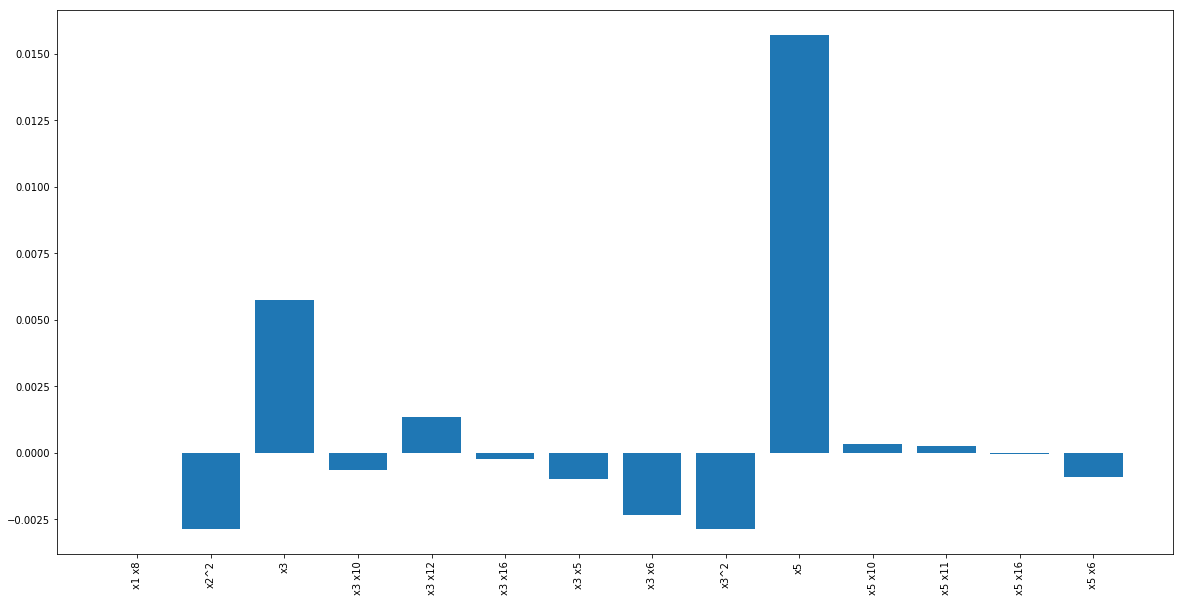

In [262]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.bar(cols_to_use, gs.best_estimator_.coef_)

### GBM

In [387]:
from sklearn.ensemble import GradientBoostingRegressor
import time
t0=time.time()

cols_to_use=['x15 x16', 'x16 x17', 'x10 x15', 'x0 x10', 'x10 x17', 'x0 x6',
       'x11 x15', 'x14 x16', 'x15', 'x0 x11', 'x0', 'x3 x15', 'x11 x17',
       'x10 x14', 'x16 x18',
 'x20 x22',
 'x6 x18',
 'x10 x18',
 'x20 x21',
 'x18 x21',
 'x13 x20',
 'x3 x20',
 'x18',
 'x20',
 'x11 x20',
 'x12 x18',
 'x9 x18',
 'x15 x16',
 'x16 x17']

gbm = GradientBoostingRegressor()
param_grid= {'random_state': [0],'n_estimators': [9,8,7],'loss':['ls'],'max_depth':[2,1],
             'max_features':['auto','sqrt'],
             'min_samples_leaf':[2,1],
             'min_samples_split':[5,4,3]}
gs= GridSearchCV(gbm, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X_2[cols_to_use], y.Ret_PlusOne, groups)

print("training time:", round(time.time()-t0, 3), "s")

gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )

#-0.015771038303451772

training time: 91.577 s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=7, presort='auto',
             random_state=0, subsample=1.0, verbose=0, warm_start=False)

-0.015791775404999493

## Ret_PlusTwo

In [263]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
group_shuffle = GroupShuffleSplit(n_splits=10, test_size=0.6, train_size=0.4, random_state=0)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor

cols_to_use=['x1 x8',
 'x3 x16',
 'x5 x10',
 'x5 x16',
 'x5',
 'x5 x6',
 'x3 x6',
 'x3 x5',
 'x5 x11',
 'x3 x10',
 'x3^2',
 'x2^2',
 'x3',
 'x3 x12']

huber = HuberRegressor()
param_grid= {'alpha': [100,20,19,18,17,16,15,12,11],'epsilon':[1],'max_iter':[700]}
gs= GridSearchCV(huber, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X_2[cols_to_use], y.Ret_PlusTwo, groups)
gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )


###do not ever overwrite the winning solution
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

grid['Ret_PlusTwo'] = ((gs.predict(test_2[cols_to_use])))

#sample['Predicted'] = grid.values.flatten()
#sample.to_csv('submissions/Ret_PlusTwo_huber_aplha_100_interaction.csv', index=False)

#-0.01575766851627325 nur mit interaction 3
#-0.01575671834227754 ohne 4
#-0.015756860156482495 mit alles interactions

HuberRegressor(alpha=100, epsilon=1, fit_intercept=True, max_iter=700,
        tol=1e-05, warm_start=False)

-0.01517831440283846

In [361]:
from sklearn.ensemble import GradientBoostingRegressor
import time
t0=time.time()

cols_to_use=['x1 x8',
 'x3 x16',
 'x5 x10',
 'x5 x16',
 'x5',
 'x5 x6',
 'x3 x6',
 'x3 x5',
 'x5 x11',
 'x3 x10',
 'x3^2',
 'x2^2',
 'x3',
 'x3 x12']

gbm = GradientBoostingRegressor()
param_grid= {'random_state': [0],'n_estimators': [8,7,6],'loss':['ls'],'max_depth':[2,1],
             'max_features':['sqrt'],
             'min_samples_leaf':[2,1],
             'min_samples_split':[10,5,4,3]}
gs= GridSearchCV(gbm, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X_2[cols_to_use], y.Ret_PlusTwo, groups)

print("training time:", round(time.time()-t0, 3), "s")

gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )


#0.0151948668047378

training time: 26.196 s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=6, presort='auto',
             random_state=0, subsample=1.0, verbose=0, warm_start=False)

-0.0151948668047378

In [357]:
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

grid['Ret_PlusTwo'] = ((gs.predict(test_2[cols_to_use])))
sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_PlusTwo_gbm_interaction.csv', index=False)

## Minute Rets

In [347]:
# Ret_Next 10

cols_to_use = ['x5 x8',
 'x4 x13',
 'x4 x12',
 'x4',
 'x4 x11',
 'x4 x16',
 'x4 x10',
 'x4 x6',
 'x3 x4',
 'x4 x9',
 'x0 x8',
 'x15^2',
 'x15 x17',
 'x14 x15',
 'x14^2',
 'x1 x6',
 'x1 x13',
 'x1 x8',
 'x17^2']

ridge = Ridge()
param_grid= {'alpha': [20000,4000,5000,10000],'normalize':[False, True],'max_iter':[700]}
gs= GridSearchCV(ridge, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X_2[cols_to_use], y.Ret_Next_10, groups)
gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )


sample = pd.read_csv('sample_submission_2.csv')
df_train = pd.read_csv('train.csv')
grid = pd.DataFrame(np.zeros([120000, 62]), columns = df_train.loc[:, 'Ret_121':'Ret_PlusTwo'].columns)
grid.shape

for cols in grid.loc[:,'Ret_121':'Ret_130'].columns:
    grid[cols] = ((gs.predict(test_2[cols_to_use]))/10)
    
sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_Next_10with_ridge_interactions.csv', index=False)
#-0.0017866446060416073

Ridge(alpha=20000, copy_X=True, fit_intercept=True, max_iter=700,
   normalize=False, random_state=None, solver='auto', tol=0.001)

-0.0017866446060416073

In [351]:
cols_to_use = ['x5 x8',
 'x4 x13',
 'x4 x12',
 'x4',
 'x4 x11',
 'x4 x16',
 'x4 x10',
 'x4 x6',
 'x3 x4',
 'x4 x9',
 'x0 x8',
 'x15^2',
 'x15 x17',
 'x14 x15',
 'x14^2',
 'x1 x6',
 'x1 x13',
 'x1 x8',
 'x17^2']


gbm = GradientBoostingRegressor()
param_grid= {'random_state': [0],'n_estimators': [8,7],'loss':['ls'],'max_depth':[2,1],
             'max_features':['sqrt'],
             'min_samples_leaf':[2,1],
             'min_samples_split':[5,4,3]}
gs= GridSearchCV(gbm, param_grid, iid=False, refit=True, cv=group_shuffle, return_train_score =True, scoring='neg_mean_absolute_error')
gs.fit(X_2[cols_to_use], y.Ret_PlusTwo, groups)

print("training time:", round(time.time()-t0, 3), "s")

gs.cv_results_ 
display(gs.best_estimator_)
display(gs.best_score_ )

for cols in grid.loc[:,'Ret_121':'Ret_130'].columns:
    grid[cols] = ((gs.predict(test_2[cols_to_use]))/10)
    
sample['Predicted'] = grid.values.flatten()
sample.to_csv('submissions/Ret_Next_10with_gbm_interactions.csv', index=False)

training time: 280.688 s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=7, presort='auto',
             random_state=0, subsample=1.0, verbose=0, warm_start=False)

-0.01520127524305033